# Exercício 05
## Dados desbalanceados
### Alunos:

- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
- Matheus Borges Kamla - 10277015

---

No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartão de crédito. 

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Tarefa 5 - Ciência de Dados/creditcard_sampled.csv")

dados

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,169526,119745.0,1.993972,-0.219347,-2.046189,0.405564,0.516149,-0.123584,-0.097123,0.058803,0.768655,-0.277899,0.257200,-0.144771,-1.648711,-0.720471,-0.943929,0.265086,0.585573,0.791781,0.381907,-0.195644,0.072511,0.345639,-0.058488,0.079695,0.192111,0.713780,-0.074037,-0.052888,28.75,0
10488,60458,49331.0,1.162141,0.249188,0.417301,1.387925,-0.091427,-0.164236,0.113784,-0.051953,0.193628,-0.144276,-0.427111,0.870636,0.510244,-0.061452,-0.164092,-0.752999,0.227011,-1.056526,-0.372550,-0.145896,-0.093470,-0.004738,-0.071066,0.112501,0.684323,-0.315129,0.043765,0.017698,10.00,0
10489,29998,35731.0,-1.065322,2.226113,1.031873,2.765116,0.447476,0.555779,-0.605831,-2.384328,-2.056265,-0.077844,1.147700,-0.296126,-0.925110,-0.379075,0.719740,0.835152,0.958895,1.246835,0.945095,0.934476,-1.466784,-0.198682,-0.160174,-0.168171,0.040714,0.127506,0.294972,0.205159,1.00,0
10490,205756,135904.0,1.818818,-0.835903,-0.482267,0.093704,-0.745343,0.041284,-0.765761,0.204703,1.390716,-0.051754,0.585032,0.593686,-0.963238,0.185015,-0.034707,0.364175,-0.656708,0.777216,0.146020,-0.087260,0.259404,0.717498,0.113169,0.782528,-0.246793,0.065097,-0.012741,-0.034304,79.95,0


Histograma:


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88c7496a58>]],
      dtype=object)

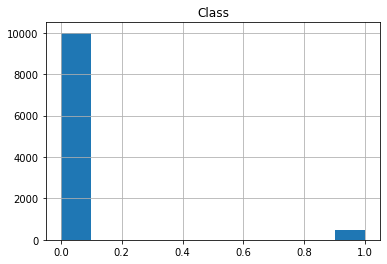

In [ ]:
print("Histograma:")
dados.hist(column='Class')

In [ ]:
print("Ocorrência das classes:")
ocorrencia = dados['Class'].value_counts()
print("Não fraude (0): ",ocorrencia[0], "\nFraude (1): ",ocorrencia[1])

Ocorrência das classes:
Não fraude (0):  10000 
Fraude (1):  492




---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo

In [ ]:
labels_input =  dados.columns[1:-1]
labels_target = dados.columns[dados.columns.size-1]

print(labels_input)
print(labels_target)

inputs = dados[labels_input]
target = dados[labels_target]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Class


In [ ]:
inputs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,119745.0,1.993972,-0.219347,-2.046189,0.405564,0.516149,-0.123584,-0.097123,0.058803,0.768655,-0.277899,0.257200,-0.144771,-1.648711,-0.720471,-0.943929,0.265086,0.585573,0.791781,0.381907,-0.195644,0.072511,0.345639,-0.058488,0.079695,0.192111,0.713780,-0.074037,-0.052888,28.75
10488,49331.0,1.162141,0.249188,0.417301,1.387925,-0.091427,-0.164236,0.113784,-0.051953,0.193628,-0.144276,-0.427111,0.870636,0.510244,-0.061452,-0.164092,-0.752999,0.227011,-1.056526,-0.372550,-0.145896,-0.093470,-0.004738,-0.071066,0.112501,0.684323,-0.315129,0.043765,0.017698,10.00
10489,35731.0,-1.065322,2.226113,1.031873,2.765116,0.447476,0.555779,-0.605831,-2.384328,-2.056265,-0.077844,1.147700,-0.296126,-0.925110,-0.379075,0.719740,0.835152,0.958895,1.246835,0.945095,0.934476,-1.466784,-0.198682,-0.160174,-0.168171,0.040714,0.127506,0.294972,0.205159,1.00
10490,135904.0,1.818818,-0.835903,-0.482267,0.093704,-0.745343,0.041284,-0.765761,0.204703,1.390716,-0.051754,0.585032,0.593686,-0.963238,0.185015,-0.034707,0.364175,-0.656708,0.777216,0.146020,-0.087260,0.259404,0.717498,0.113169,0.782528,-0.246793,0.065097,-0.012741,-0.034304,79.95


In [ ]:
target

0        1
1        1
2        1
3        1
4        1
        ..
10487    0
10488    0
10489    0
10490    0
10491    0
Name: Class, Length: 10492, dtype: int64



---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados. 
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [ ]:
def undersample(inputs, targets):
  class_dist = targets.value_counts()
  num_nao_fraude = class_dist[0]
  num_fraude = class_dist[1]

  dados = pd.concat([inputs,targets],axis=1)
  nao_fraude = dados[dados['Class'] == 0]
  nao_fraude_undersampled = nao_fraude.sample(n=num_fraude,replace=False)
  

  fraude = dados[dados['Class'] == 1]

  dados_undersampled = pd.concat([fraude, nao_fraude_undersampled],axis=0)

  undersampled_inputs = dados_undersampled[dados_undersampled.columns[0:-1]]

  undersampled_targets =  dados_undersampled[dados_undersampled.columns[dados_undersampled.columns.size - 1]]
    
  return undersampled_inputs, undersampled_targets

In [ ]:
from sklearn.preprocessing import normalize, minmax_scale

normalize_inputs = ((inputs-inputs.min())/(inputs.max()-inputs.min()))
normalize_inputs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.002084,0.857369,0.601664,0.839772,0.520857,0.564029,0.303066,0.660094,0.695084,0.447559,0.570610,0.443954,0.678646,0.410506,0.554701,0.583350,0.711027,0.700038,0.700986,0.460016,0.532622,0.466293,0.513187,0.674593,0.450402,0.696363,0.329344,0.590431,0.453702,0.000000
1,0.002466,0.835166,0.500439,0.916600,0.419957,0.613211,0.318117,0.706165,0.671179,0.552446,0.621187,0.215869,0.781698,0.582847,0.651228,0.775575,0.809971,0.807547,0.829780,0.445021,0.592604,0.469182,0.540466,0.721845,0.358464,0.718092,0.263368,0.550106,0.463463,0.069274
2,0.025565,0.857638,0.597846,0.875366,0.422413,0.556204,0.359268,0.709975,0.665752,0.553819,0.603223,0.370223,0.521270,0.494277,0.659476,0.453456,0.648543,0.638858,0.508857,0.263457,0.515712,0.450065,0.461164,0.690965,0.389380,0.677834,0.182273,0.573045,0.453170,0.031420
3,0.040176,0.794045,0.589904,0.811783,0.443047,0.548194,0.291417,0.644665,0.668215,0.553419,0.517531,0.550776,0.334120,0.516155,0.462461,0.535971,0.370688,0.393841,0.322861,0.447826,0.523558,0.467419,0.525479,0.675338,0.394445,0.715562,0.158826,0.505038,0.507835,0.007726
4,0.043262,0.965039,0.622819,0.763045,0.564238,0.672385,0.305929,0.728499,0.664159,0.509977,0.579106,0.374538,0.605134,0.689618,0.488171,0.496365,0.914802,1.000000,0.927157,0.107747,0.529044,0.448367,0.474395,0.669676,0.157989,0.829755,0.408742,0.569154,0.469517,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,0.692951,0.988104,0.558646,0.827348,0.308796,0.591164,0.357279,0.699363,0.673253,0.596078,0.635852,0.258236,0.797107,0.267739,0.687337,0.424209,0.787982,0.807104,0.760765,0.456083,0.522829,0.457398,0.535257,0.685032,0.414390,0.709993,0.438746,0.564131,0.458630,0.003765
10488,0.285316,0.962850,0.567928,0.897491,0.366786,0.575286,0.355588,0.702757,0.671439,0.571944,0.639347,0.215079,0.840765,0.560316,0.711830,0.517265,0.732252,0.795864,0.624122,0.371410,0.524339,0.454079,0.514945,0.684709,0.419302,0.755450,0.228713,0.573374,0.462478,0.001310
10489,0.206585,0.895224,0.607095,0.914989,0.448084,0.589369,0.385545,0.691177,0.633235,0.477518,0.641085,0.314396,0.790599,0.365800,0.700025,0.622730,0.819188,0.818806,0.794407,0.519290,0.557143,0.426613,0.503701,0.682422,0.377275,0.696012,0.319069,0.593086,0.472699,0.000131
10490,0.786497,0.982787,0.546431,0.871877,0.290387,0.558198,0.364139,0.688603,0.675642,0.622185,0.641767,0.278911,0.828858,0.360633,0.720990,0.532704,0.793406,0.768163,0.759688,0.429609,0.526119,0.461136,0.556816,0.689437,0.519629,0.669459,0.306329,0.568940,0.459643,0.010470


In [ ]:

undersampled_inputs, undersampled_targets = undersample(normalize_inputs, target)
undersampled_inputs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.002084,0.857369,0.601664,0.839772,0.520857,0.564029,0.303066,0.660094,0.695084,0.447559,0.570610,0.443954,0.678646,0.410506,0.554701,0.583350,0.711027,0.700038,0.700986,0.460016,0.532622,0.466293,0.513187,0.674593,0.450402,0.696363,0.329344,0.590431,0.453702,0.000000
1,0.002466,0.835166,0.500439,0.916600,0.419957,0.613211,0.318117,0.706165,0.671179,0.552446,0.621187,0.215869,0.781698,0.582847,0.651228,0.775575,0.809971,0.807547,0.829780,0.445021,0.592604,0.469182,0.540466,0.721845,0.358464,0.718092,0.263368,0.550106,0.463463,0.069274
2,0.025565,0.857638,0.597846,0.875366,0.422413,0.556204,0.359268,0.709975,0.665752,0.553819,0.603223,0.370223,0.521270,0.494277,0.659476,0.453456,0.648543,0.638858,0.508857,0.263457,0.515712,0.450065,0.461164,0.690965,0.389380,0.677834,0.182273,0.573045,0.453170,0.031420
3,0.040176,0.794045,0.589904,0.811783,0.443047,0.548194,0.291417,0.644665,0.668215,0.553419,0.517531,0.550776,0.334120,0.516155,0.462461,0.535971,0.370688,0.393841,0.322861,0.447826,0.523558,0.467419,0.525479,0.675338,0.394445,0.715562,0.158826,0.505038,0.507835,0.007726
4,0.043262,0.965039,0.622819,0.763045,0.564238,0.672385,0.305929,0.728499,0.664159,0.509977,0.579106,0.374538,0.605134,0.689618,0.488171,0.496365,0.914802,1.000000,0.927157,0.107747,0.529044,0.448367,0.474395,0.669676,0.157989,0.829755,0.408742,0.569154,0.469517,0.000131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,0.403073,0.875564,0.594180,0.930384,0.183444,0.572016,0.325745,0.715465,0.667384,0.609845,0.685163,0.349328,0.824556,0.451435,0.688584,0.531722,0.796596,0.753251,0.698065,0.344244,0.554677,0.449373,0.511675,0.683867,0.484044,0.670998,0.415628,0.569809,0.434890,0.000098
1915,0.196257,0.905282,0.553092,0.938687,0.366308,0.591810,0.351156,0.688287,0.677992,0.584859,0.636735,0.193699,0.821058,0.508554,0.702099,0.587721,0.740179,0.795731,0.685973,0.430742,0.534318,0.460843,0.555973,0.695834,0.415095,0.573063,0.187158,0.594318,0.476949,0.001308
7424,0.435805,0.963849,0.576666,0.876471,0.357627,0.581930,0.324440,0.704523,0.670482,0.547756,0.629547,0.359139,0.832804,0.500554,0.670177,0.580491,0.816361,0.808514,0.780786,0.375465,0.526546,0.455673,0.515650,0.682968,0.432673,0.753996,0.222533,0.572515,0.464117,0.000131
8187,0.517396,0.863738,0.603471,0.822841,0.104555,0.688151,0.478336,0.742632,0.655387,0.686965,0.772632,0.296023,0.771254,0.396215,0.654782,0.618677,0.683946,0.743961,0.634408,0.348451,0.590057,0.444622,0.558761,0.677919,0.508581,0.707106,0.280390,0.593799,0.429179,0.001046


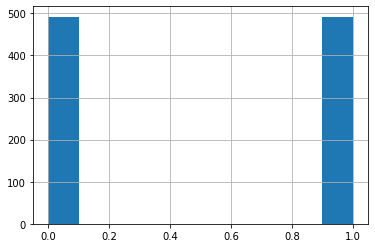

In [ ]:
undersampled_targets.hist()



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados. 

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [ ]:
def oversample(inputs, targets):
  class_dist = targets.value_counts()
  num_nao_fraude = class_dist[0]
  num_fraude = class_dist[1]

  dados = pd.concat([inputs,targets],axis=1)
  nao_fraude = dados[dados['Class'] == 0]

  fraude = dados[dados['Class'] == 1]
  fraude_oversampled = fraude.sample(n=num_nao_fraude,replace=True)

  dados_oversampled = pd.concat([fraude_oversampled, nao_fraude],axis=0)

  oversampled_inputs = dados_oversampled[dados_oversampled.columns[0:-1]]

  oversampled_targets =  dados_oversampled[dados_oversampled.columns[dados_oversampled.columns.size - 1]]
    
  return oversampled_inputs, oversampled_targets

In [ ]:
print(type(target))
oversampled_inputs, oversampled_targets = oversample(normalize_inputs,target)
oversampled_inputs

<class 'pandas.core.series.Series'>


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
401,0.811906,0.956441,0.627439,0.742131,0.558313,0.656452,0.306269,0.716711,0.642486,0.475722,0.607875,0.411068,0.740430,0.395575,0.437404,0.469863,0.945337,0.966336,0.982443,0.198884,0.517187,0.484038,0.471127,0.695728,0.224878,0.573470,0.293115,0.583253,0.467417,0.000101
92,0.200541,0.901433,0.625039,0.741737,0.604860,0.512497,0.287058,0.612755,0.691773,0.399793,0.458443,0.540316,0.432314,0.650917,0.298525,0.589975,0.415854,0.369051,0.370999,0.461711,0.561737,0.479802,0.520458,0.677759,0.370125,0.789502,0.348389,0.677698,0.499199,0.002491
94,0.206816,0.829840,0.616653,0.792701,0.365248,0.534667,0.285324,0.651524,0.642857,0.554864,0.550217,0.480389,0.503012,0.336546,0.365578,0.646801,0.518816,0.503682,0.474341,0.428073,0.546127,0.492105,0.463598,0.678171,0.420880,0.683661,0.340421,0.545575,0.420878,0.007936
319,0.546006,0.124313,0.889840,0.026376,0.810479,0.110095,0.311331,0.198896,0.484924,0.166681,0.062804,0.520767,0.347901,0.395792,0.568194,0.250431,0.400696,0.398107,0.295544,0.349481,0.614159,0.280836,0.715862,0.709541,0.440615,0.624086,0.095734,0.000000,0.389277,0.000131
61,0.153278,0.366672,0.792541,0.276208,0.641317,0.200029,0.189896,0.461860,0.875907,0.393702,0.406664,0.618280,0.439412,0.501833,0.376183,0.538136,0.380088,0.356255,0.335655,0.561496,0.576681,0.490770,0.442685,0.676364,0.416787,0.814411,0.248549,0.697746,0.487807,0.013094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,0.692951,0.988104,0.558646,0.827348,0.308796,0.591164,0.357279,0.699363,0.673253,0.596078,0.635852,0.258236,0.797107,0.267739,0.687337,0.424209,0.787982,0.807104,0.760765,0.456083,0.522829,0.457398,0.535257,0.685032,0.414390,0.709993,0.438746,0.564131,0.458630,0.003765
10488,0.285316,0.962850,0.567928,0.897491,0.366786,0.575286,0.355588,0.702757,0.671439,0.571944,0.639347,0.215079,0.840765,0.560316,0.711830,0.517265,0.732252,0.795864,0.624122,0.371410,0.524339,0.454079,0.514945,0.684709,0.419302,0.755450,0.228713,0.573374,0.462478,0.001310
10489,0.206585,0.895224,0.607095,0.914989,0.448084,0.589369,0.385545,0.691177,0.633235,0.477518,0.641085,0.314396,0.790599,0.365800,0.700025,0.622730,0.819188,0.818806,0.794407,0.519290,0.557143,0.426613,0.503701,0.682422,0.377275,0.696012,0.319069,0.593086,0.472699,0.000131
10490,0.786497,0.982787,0.546431,0.871877,0.290387,0.558198,0.364139,0.688603,0.675642,0.622185,0.641767,0.278911,0.828858,0.360633,0.720990,0.532704,0.793406,0.768163,0.759688,0.429609,0.526119,0.461136,0.556816,0.689437,0.519629,0.669459,0.306329,0.568940,0.459643,0.010470


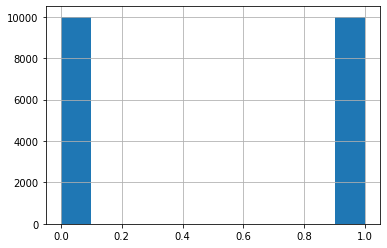

In [ ]:
oversampled_targets.hist()

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes 

In [ ]:
def hybridsample(inputs, targets):
  
  class_dist = targets.value_counts()
  num_nao_fraude = class_dist[0]
  num_fraude = class_dist[1]
  tamanho_dataset = num_fraude+num_nao_fraude
  tam_sampled = int(tamanho_dataset/3)

  dados = pd.concat([inputs,targets],axis=1)

  nao_fraude = dados[dados['Class'] == 0]
  nao_fraude_undersampled = nao_fraude.sample(n=tam_sampled,replace=False)
    
  fraude = dados[dados['Class'] == 1]
  fraude_oversampled = fraude.sample(n=tam_sampled,replace=True)

  dados_hybridsampled = pd.concat([fraude_oversampled, nao_fraude_undersampled],axis=0)

  hybridsampled_inputs = dados_hybridsampled[dados_hybridsampled.columns[0:-1]]

  hybridsampled_targets =  dados_hybridsampled[dados_hybridsampled.columns[dados_hybridsampled.columns.size - 1]]

  return hybridsampled_inputs, hybridsampled_targets

In [ ]:
hybridsampled_inputs, hybridsampled_targets = hybridsample(normalize_inputs, target)
hybridsampled_inputs

           Time        V1        V2  ...       V27       V28    Amount
0      0.002084  0.857369  0.601664  ...  0.590431  0.453702  0.000000
1      0.002466  0.835166  0.500439  ...  0.550106  0.463463  0.069274
2      0.025565  0.857638  0.597846  ...  0.573045  0.453170  0.031420
3      0.040176  0.794045  0.589904  ...  0.505038  0.507835  0.007726
4      0.043262  0.965039  0.622819  ...  0.569154  0.469517  0.000131
...         ...       ...       ...  ...       ...       ...       ...
10487  0.692951  0.988104  0.558646  ...  0.564131  0.458630  0.003765
10488  0.285316  0.962850  0.567928  ...  0.573374  0.462478  0.001310
10489  0.206585  0.895224  0.607095  ...  0.593086  0.472699  0.000131
10490  0.786497  0.982787  0.546431  ...  0.568940  0.459643  0.010470
10491  0.358051  0.960809  0.562908  ...  0.575866  0.463280  0.001308

[10492 rows x 30 columns]
<class 'pandas.core.series.Series'>


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
270,0.490587,0.884127,0.547092,0.917593,0.307863,0.570327,0.360127,0.722268,0.675495,0.540865,0.624460,0.322401,0.804349,0.284952,0.741142,0.556714,0.792523,0.770995,0.718199,0.285237,0.548025,0.462459,0.516031,0.708217,0.419671,0.706692,0.166594,0.560497,0.463454,0.046401
246,0.437281,0.840545,0.609489,0.770200,0.519998,0.487173,0.309124,0.628918,0.692218,0.466876,0.498859,0.434265,0.496843,0.491976,0.435550,0.506884,0.359197,0.405589,0.340336,0.696599,0.536968,0.476942,0.542806,0.696913,0.444686,0.645438,0.217156,0.618217,0.505304,0.016308
3,0.040176,0.794045,0.589904,0.811783,0.443047,0.548194,0.291417,0.644665,0.668215,0.553419,0.517531,0.550776,0.334120,0.516155,0.462461,0.535971,0.370688,0.393841,0.322861,0.447826,0.523558,0.467419,0.525479,0.675338,0.394445,0.715562,0.158826,0.505038,0.507835,0.007726
446,0.881456,0.768999,0.654956,0.633391,0.740784,0.538293,0.272571,0.633256,0.688331,0.500627,0.584557,0.508872,0.438142,0.343074,0.222131,0.678138,0.544306,0.616580,0.612324,0.530626,0.523405,0.467186,0.551407,0.700299,0.308372,0.671689,0.371062,0.358627,0.483755,0.000131
3,0.040176,0.794045,0.589904,0.811783,0.443047,0.548194,0.291417,0.644665,0.668215,0.553419,0.517531,0.550776,0.334120,0.516155,0.462461,0.535971,0.370688,0.393841,0.322861,0.447826,0.523558,0.467419,0.525479,0.675338,0.394445,0.715562,0.158826,0.505038,0.507835,0.007726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5707,0.845732,0.918703,0.586832,0.884482,0.252146,0.582752,0.314029,0.712531,0.674863,0.547866,0.625733,0.186706,0.841701,0.651146,0.721828,0.469421,0.772020,0.779340,0.639372,0.402104,0.526314,0.451832,0.486826,0.689325,0.412806,0.652599,0.320909,0.580121,0.463521,0.000259
5881,0.128020,0.883540,0.585129,0.978643,0.478644,0.559772,0.439890,0.686695,0.677252,0.649022,0.659443,0.167330,0.698320,0.793557,0.704995,0.324073,0.743464,0.824496,0.752574,0.568900,0.530794,0.454860,0.549251,0.678935,0.356529,0.719157,0.392944,0.541062,0.468544,0.000155
2168,0.374955,0.960240,0.549181,0.877959,0.207200,0.559858,0.326832,0.701129,0.672289,0.617923,0.618491,0.332608,0.825155,0.184684,0.748527,0.596799,0.711384,0.802780,0.686987,0.511021,0.525973,0.457491,0.525851,0.682076,0.441704,0.746835,0.311917,0.567635,0.461547,0.011524
7704,0.819814,0.990290,0.566202,0.824352,0.302300,0.597660,0.328927,0.706559,0.666190,0.584569,0.629409,0.175678,0.816807,0.662126,0.677166,0.645074,0.795524,0.789094,0.748528,0.399075,0.527268,0.459205,0.552607,0.681854,0.238371,0.729546,0.284857,0.570012,0.459614,0.004321


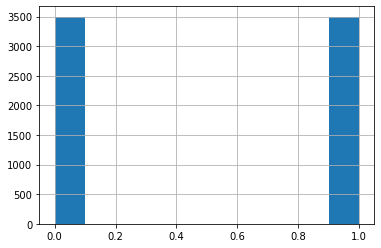

In [ ]:
hybridsampled_targets.hist()



---

### Questão 06.
- Complete a função *model_tester* de forma que a base seja alterada caso uma função de amostragem seja passada como parâmetro.

- Normalize as **variáveis de entrada** entre 0 e 1 (`sklearn.preprocessing.MinMaxScaler`). 

- Teste o score de classificação, utilizando a função `model_tester` abaixo, para cada função criada nas questões anteriores utilizando os dados normalizados.

- **Dica: Lembre-se que não podemos usar informações do teste para auxiliar no treinamento! Isso vale tanto para a amostragem quanto para o Scaler.**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np


def model_tester(inputs, target, sampler_func, weights=None):
  """
  Executa classificação do conjunto de dados passado
  ---------------------------------------------------------------
  inputs:     Variáveis de entrada (X)
  target:     Variáveis alvo (y)  
  sampler_func: Uma função que irá balancear os dados de acordo com a
                distribuição das classes
  weights:    Dicionário com o peso de cada classe. Cada chave do dicionário é
              uma classe, e seu valor o associado a essa classe. Por exemplo, se
              tivermos duas classes 0 e 1 com mesmo peso, teremos o dicionario:
              {0: 0.5, 1: 0.5}

  ---------------------------------------------------------------
  Realiza a classificação em 3 modelos (SVM com kernel linear, 
  SVM com kernel polinomial de grau 3, Árvore de decisão)
  O desempenho é calculado utilizando a acurácia balanceada.
  """


  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(target, pd.core.frame.DataFrame) or isinstance(target, pd.core.series.Series):
    target = target.values
  testes = {
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights)    
  }
  for teste in testes:
    clf = testes[teste]    
    skf = StratifiedKFold(n_splits=10)
    scores = []
    for train_index, test_index in skf.split(inputs, target):
      inputs_df_train = inputs[train_index]
      target_df_train = target[train_index]
      inputs_df_test = inputs[test_index]
      target_df_test = target[test_index]

      inputs_df_train = pd.DataFrame(inputs_df_train, columns=labels_input)
      target_df_train = pd.Series(data = target_df_train, name="Class")
      inputs_df_test = pd.DataFrame(inputs_df_test, columns=labels_input)
      target_df_test = pd.Series(data = target_df_test, name="Class")

      if sampler_func is None:      
        X_train, y_train = inputs_df_train, target_df_train
        X_test, y_test = inputs_df_test, target_df_test
      else:
        
        if(sampler_func == "undersample"):
          X_train, y_train = undersample(inputs_df_train, target_df_train)
          X_test, y_test = undersample(inputs_df_test, target_df_test)
        elif(sampler_func == "oversample"):
          X_train, y_train = oversample(inputs_df_train, target_df_train)
          X_test, y_test = oversample(inputs_df_test, target_df_test)
        elif(sampler_func == "hybridsample"):
          X_train, y_train = hybridsample(inputs_df_train, target_df_train)
          X_test, y_test = hybridsample(inputs_df_test, target_df_test)
        
      #Acabamos utilizando o pandas para normalizar
      normalize_X_train = ((X_train-X_train.min())/(X_train.max()-X_train.min()))
      normalize_X_test = ((X_test-X_test.min())/(X_test.max()-X_test.min()))

      X_train = normalize_X_train.values
      y_train = y_train.values
      
      X_test = normalize_X_test.values
      y_test = y_test.values

      clf.fit(X_train, y_train)
      
      y_pred = clf.predict(X_test)      
      #scores.append(precision_score(y_test, y_pred,labels=[0, 1], average='macro', zero_division=0))
      scores.append(balanced_accuracy_score(y_test, y_pred))
    print("Score do classificador '%s': %.2f" % (teste, np.mean(scores)*100))


In [ ]:
#Testando sem técnicas de balanceamento
model_tester(inputs, target, sampler_func=None)

Score do classificador 'SVM Linear': 71.77
Score do classificador 'SVM Polinomial grau 3': 68.22
Score do classificador 'Decision Tree (gini)': 77.04


In [ ]:
#balanceando utilizando undersampling
model_tester(inputs, target, sampler_func="undersample")

Score do classificador 'SVM Linear': 87.26
Score do classificador 'SVM Polinomial grau 3': 82.67
Score do classificador 'Decision Tree (gini)': 75.76


In [ ]:
#balanceando utilizando oversampling
model_tester(inputs, target, sampler_func="oversample")

Score do classificador 'SVM Linear': 73.58
Score do classificador 'SVM Polinomial grau 3': 67.34
Score do classificador 'Decision Tree (gini)': 81.09


In [ ]:
#balanceando utilizando técnica híbrida
model_tester(inputs, target, sampler_func="hybridsample")

Score do classificador 'SVM Linear': 82.70
Score do classificador 'SVM Polinomial grau 3': 72.34
Score do classificador 'Decision Tree (gini)': 80.15




---

### Questão 07.

Teste o score de classificação no conjunto original alterando o parâmetro `weights`. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso de cada classe no processo de treinamento. Teste 2 conjuntos de `weights` diferentes e compare com o resultado do conjunto original sem o uso dessa variavel.

Teste os mesmos conjutos de `weights` combinados com algum método de amostragem de sua preferência.

In [ ]:
#Original sem o uso de pesos
model_tester(inputs, target, sampler_func=None)

Score do classificador 'SVM Linear': 71.77
Score do classificador 'SVM Polinomial grau 3': 68.22
Score do classificador 'Decision Tree (gini)': 76.26


In [ ]:
#Utilizando pesos nas classes
model_tester(inputs, target, sampler_func=None, weights={0: 0.1, 1: 2})

Score do classificador 'SVM Linear': 81.52
Score do classificador 'SVM Polinomial grau 3': 72.18
Score do classificador 'Decision Tree (gini)': 80.87


In [ ]:
#Utilizando pesos nas classes
model_tester(inputs, target, sampler_func=None, weights={0: 0.2, 1: 0.8})

Score do classificador 'SVM Linear': 78.29
Score do classificador 'SVM Polinomial grau 3': 73.01
Score do classificador 'Decision Tree (gini)': 74.40
